# Fashion Mnist TF2





In [1]:
%tensorflow_version 2.x 

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder

# 1. Import Data Set


In [3]:
from tensorflow.keras.datasets.fashion_mnist import load_data
fashion_mnist = load_data()
(x_train, y_train), (x_test, y_test)=fashion_mnist

## Explore the data

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


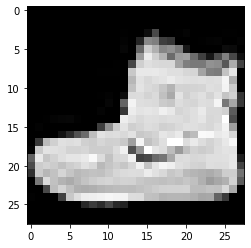

In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
imagedemo = x_train[0]
plt.imshow(imagedemo,cmap='gray')

In [5]:

def print_image(img):
  s = '\n'.join([''.join(['{:4}'.format(int(round(item * 255))) for item in row]) for row in img])
  print(s)

print_image(imagedemo)

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0 255   0   0331518615   0   0 2551020   0   0   0   0 255 255   0
   0   0   0   0   0   0   0   0   0   0   0   0 765   0918034680323851581013770   0   0   0 255 7651020   0   0 765
   0   0   0   0   0   0   0   0   0   0   0   01530   02601052020448803417036720313655865   0   0   0   030602550   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   039525601805278545390272853978041055277951632058651963533150183603825
   0   0   0   0   0   0   0   0   0   0   0 255   0175955278556865555905508055080415653238530855311103723035955224404386016830
   0   0   0   0   0   0   0   0   0 255 255 255   0510005

## Prepare the input

In [6]:
x_train = x_train.reshape(-1,28*28).astype('float32')
x_test = x_test.reshape(-1,28*28).astype('float32')
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## Prepare the output

In [7]:
#ONE HOT
onehot_encoder = OneHotEncoder(sparse=False)
y_train = y_train.reshape(len(y_train),1)
y_train_onehot = onehot_encoder.fit_transform(y_train)

y_test = y_test.reshape(len(y_test),1)
y_test_one_hot = onehot_encoder.fit_transform(y_test)
y_train_onehot.shape

(60000, 10)

# 2. Set up the architecture
  

In [8]:
class DNN_Model(object):
  def __init__(self,
              n_nodes_input = 784,
              n_nodes_hl1 = 500,
              n_nodes_hl2 = 500,
              n_nodes_hl3 = 500,
              n_classes = 10):
    # Declare DNN Variables with numpy
    self.hl1W = tf.Variable(np.random.rand(n_nodes_input,n_nodes_hl1),name = "hl1weights",dtype = "float32")
    self.hl1B = tf.Variable(np.random.rand(n_nodes_hl1),name = "hl1bias",dtype = "float32")
    self.hl2W = tf.Variable(np.random.rand(n_nodes_hl1,n_nodes_hl2),name = "hl2weights",dtype = "float32")
    self.hl2B = tf.Variable(np.random.rand(n_nodes_hl2),name = "hl2bias",dtype = "float32")
    self.hl3W = tf.Variable(np.random.rand(n_nodes_hl2,n_nodes_hl3),name = "hl3weights",dtype = "float32")
    self.hl3B = tf.Variable(np.random.rand(n_nodes_hl3),name = "hl3bias",dtype = "float32")
    self.outW = tf.Variable(np.random.rand(n_nodes_hl3,n_classes),name = "outweights",dtype = "float32")
    self.outB = tf.Variable(np.random.rand(n_classes),name = "outbias",dtype = "float32")
    # Auxiliar List
    self.trainable_variables = [self.hl1W,self.hl1B,self.hl2W,self.hl2B,self.hl3W,self.hl3B,self.outW,self.outB]

  def __call__(self,x):
    # Declare architecture
    l1 = tf.add(tf.matmul(x,self.hl1W),self.hl1B)
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1,self.hl2W),self.hl2B)
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2,self.hl3W),self.hl3B)
    l3 = tf.nn.relu(l3)

    output = tf.add(tf.matmul(l3,self.outW),self.outB)

    return output


DNN = DNN_Model()   # model declaration
DNN(x_train[24:30]) # forward propagation



<tf.Tensor: shape=(6, 10), dtype=float32, numpy=
array([[7.0784726e+11, 6.9356133e+11, 7.2840754e+11, 7.0671807e+11,
        6.7418849e+11, 6.9263740e+11, 6.8085966e+11, 7.2332607e+11,
        7.1355263e+11, 6.7796363e+11],
       [5.1667173e+11, 5.0624450e+11, 5.3167922e+11, 5.1584768e+11,
        4.9210353e+11, 5.0557026e+11, 4.9697305e+11, 5.2796988e+11,
        5.2083622e+11, 4.9485903e+11],
       [5.8271708e+11, 5.7095723e+11, 5.9964326e+11, 5.8178804e+11,
        5.5500885e+11, 5.7019662e+11, 5.6050051e+11, 5.9545977e+11,
        5.8741457e+11, 5.5811663e+11],
       [8.5779441e+11, 8.4048282e+11, 8.8271041e+11, 8.5642602e+11,
        8.1700585e+11, 8.3936267e+11, 8.2509011e+11, 8.7655186e+11,
        8.6470859e+11, 8.2158079e+11],
       [4.7039575e+11, 4.6090237e+11, 4.8405889e+11, 4.6964546e+11,
        4.4802798e+11, 4.6028813e+11, 4.5246133e+11, 4.8068205e+11,
        4.7418730e+11, 4.5053680e+11],
       [7.4129021e+11, 7.2632985e+11, 7.6282239e+11, 7.4010801e+11,
        

# 3. Choose Optimizer & Metrics

In [9]:
'''Optmizer'''
#optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.001)

'''Metrics'''
# Declare which one is going to be our cost function 
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.CategoricalAccuracy(name='test_accuracy')

# 4. Training & Testing Function

In [10]:
@tf.function #NON EAGER EXECUTION
def train_step(model,data,labels):
  with tf.GradientTape() as tape: # in tape the gradients are going to be saved
    predictions = model(data) # forward propagation
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels,predictions)) # compute cost function

  #optimize
  gradients = tape.gradient(loss,model.trainable_variables)
  capped_grads_and_vars = [(grad,model.trainable_variables[index]) for index,grad in enumerate(gradients)]
  #adjust variables
  optimizer.apply_gradients(capped_grads_and_vars)
  train_loss(loss)
  train_accuracy(labels,predictions)

In [11]:
@tf.function
def test_step(model,data,labels):
  predictions = model(data)
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels,predictions))
  test_loss(loss)
  test_accuracy(labels,predictions)

In [12]:


def fitting(model,train_x,train_y,test_x,test_y,epochs,n_batch,batch_size):
  for epoch in range(epochs):
    i = 0
    while i + batch_size < len(train_x) or i + batch_size < batch_size * n_batch:
      start = i
      end = start + batch_size
      batch_x = train_x[start:end]
      batch_y = train_y[start:end]
      train_step(model,batch_x,batch_y)
      i += batch_size
    test_step(model,test_x,test_y)
    template = 'Epoch {},Loss:{},Accuracy:{},Test Loss:{}, Test Accuracy:{}'
    print(template.format(epoch+1,
                          train_loss.result(),
                          train_accuracy.result()*100,
                          test_loss.result(),
                          test_accuracy.result() * 100))
    train_loss.reset_states() 
    train_accuracy.reset_states()
    
    test_loss.reset_states()
    test_accuracy.reset_states()


In [13]:
fitting(DNN,x_train,y_train_onehot,x_test,y_test_one_hot,10,600,100)

Epoch 1,Loss:765523456.0,Accuracy:9.858097076416016,Test Loss:364167776.0, Test Accuracy:10.0
Epoch 2,Loss:200801600.0,Accuracy:10.373956680297852,Test Loss:92108840.0, Test Accuracy:10.0
Epoch 3,Loss:44204744.0,Accuracy:14.467445373535156,Test Loss:5501475.5, Test Accuracy:30.59000015258789
Epoch 4,Loss:4020954.5,Accuracy:40.8664436340332,Test Loss:1398236.0, Test Accuracy:54.94999694824219
Epoch 5,Loss:1319014.0,Accuracy:56.22203826904297,Test Loss:2127148.0, Test Accuracy:48.09000015258789
Epoch 6,Loss:678173.875,Accuracy:64.16527557373047,Test Loss:388360.1875, Test Accuracy:69.05000305175781
Epoch 7,Loss:408527.21875,Accuracy:68.93990325927734,Test Loss:241184.0, Test Accuracy:72.43999481201172
Epoch 8,Loss:194618.625,Accuracy:74.237060546875,Test Loss:158377.453125, Test Accuracy:73.11000061035156
Epoch 9,Loss:105946.328125,Accuracy:76.2587661743164,Test Loss:85605.6484375, Test Accuracy:76.77000427246094
Epoch 10,Loss:49966.03125,Accuracy:78.72621154785156,Test Loss:53319.277343

In [14]:
label_dict = {
 0: "T-shirt/top",
 1: "Trouser",
 2: "Pullover",
 3: "Dress",
 4: "Coat",
 5: "Sandal",
 6: "Shirt",
 7: "Sneaker",
 8: "Bag",
 9: "Ankle boot"
}